In [51]:
%matplotlib inline

import numpy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.ticker

popt_seg.csv
# Samples = 31, # Features = 16
popt_noseg.csv
# Samples = 31, # Features = 8
popt_seg_orig.csv
# Samples = 31, # Features = 14


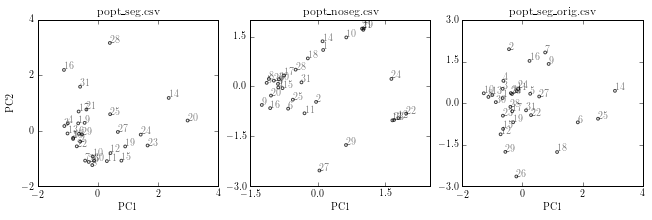

In [75]:
import glob
import os

def plot2dprojection(path, **kwargs):
    data = numpy.loadtxt(path, delimiter=',')
    n_samples, n_features = data.shape
    print os.path.basename(path)
    print '# Samples = {}, # Features = {}'.format(n_samples, n_features)
    model = PCA(n_components=2, whiten=True)
    reduced_data = model.fit_transform(data)
    plt.scatter(*reduced_data.T, **kwargs)
    for i in xrange(n_samples):
        plt.gca().annotate(str(i + 1), tuple(reduced_data[i]), alpha=.5, fontsize='medium')

pattern = '~/repos/misinfo_spread/data/fit_results/popt_*.csv'    
paths = glob.glob(os.path.expanduser(pattern))
kwargs = dict(s=30, c='none', marker='.', alpha=.75)
fig, axs = plt.subplots(nrows=1, ncols=len(paths), figsize=(9, 3))

for ax, path in zip(axs, paths):
    plt.sca(ax)
    plot2dprojection(path, **kwargs)
    title = os.path.basename(path)
    plt.title(title.replace('_', '\_'))
    plt.xlabel('PC1')
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(4))
    ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(4))
    
axs[0].set_ylabel('PC2')
plt.tight_layout(pad=.5)
plt.savefig('2dprojection.pdf')